# 多层感知机

定义：含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换

别称：人工神经网络（ANN，Artificial Neural Network）

超参数：层数、各隐藏层中隐藏单元个数

H = a*(X * Wh + bh) a为激活函数

O = H * Wo + bo

分类问题：对O作softmax 并使用softmax回归中的交叉商损失函数

回归问题：输出层输出个数为1 并将输出O直接提供线性回归使用的平方损失函数

In [46]:
import torch
import numpy as np
import sys
sys.path.append("/home/xixixi/Dive-into-DL-PyTorch/code")
import d2lzh_pytorch as d2l

batch_size = 256
train_iter , test_iter = d2l.load_data_fashion_mnist(batch_size) #使用fashion-MNIST数据集

num_inputs , num_outputs , num_hiddens = 784 , 10 , 256

图片28x28 784个像素点 输入层 784 

类别10 输出层 10

隐藏层（超参） 256

In [47]:
W1 = torch.tensor(np.random.normal(0,0.01,(num_inputs,num_hiddens)),dtype = torch.float)
b1 = torch.zeros(num_hiddens,dtype = torch.float)
W2 = torch.tensor(np.random.normal(0,0.01,(num_hiddens,num_outputs)),dtype = torch.float)
b2 = torch.zeros(num_outputs,dtype = torch.float)

params = [W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad = True)

# 定义激活函数

调用max函数实现ReLU

In [48]:
def relu(X):
    return torch.max(input = X , other = torch.tensor(0.0))

# 定义模型



In [49]:
def net(X):
    X = X.view(-1,num_inputs) #X.shape [256,1,28,28] -> [256,784]
    H = relu(torch.matmul(X,W1)+b1) #隐藏层
    return torch.matmul(H,W2)+b2 #输出层

# 定义损失函数

直接使用PyTorch提供的包括softmax运算和交叉商损失计算的函数

In [50]:
loss = torch.nn.CrossEntropyLoss()

# 训练模型

In [51]:
def xyplot(x_vals,y_vals,name = ' '):
    d2l.set_figsize(figsize = (5,2.5))
    d2l.plt.plot(x_vals.detach().numpy(),y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name+'(x)')

from matplotlib import pyplot as plt

epoch 1 , loss 0.003052 , train acc 0.711900 , test acc 0.801300
epoch 2 , loss 0.001883 , train acc 0.824033 , test acc 0.824600
epoch 3 , loss 0.001653 , train acc 0.845117 , test acc 0.839400
epoch 4 , loss 0.001534 , train acc 0.855667 , test acc 0.841600
epoch 5 , loss 0.001464 , train acc 0.861517 , test acc 0.833300
epoch 6 , loss 0.001377 , train acc 0.871667 , test acc 0.852700
epoch 7 , loss 0.001330 , train acc 0.875750 , test acc 0.853800
epoch 8 , loss 0.001272 , train acc 0.879800 , test acc 0.858500
epoch 9 , loss 0.001246 , train acc 0.882183 , test acc 0.866600
epoch 10 , loss 0.001203 , train acc 0.886483 , test acc 0.863000
epoch 11 , loss 0.001169 , train acc 0.890400 , test acc 0.834800
epoch 12 , loss 0.001143 , train acc 0.893217 , test acc 0.851500
epoch 13 , loss 0.001115 , train acc 0.895400 , test acc 0.864800
epoch 14 , loss 0.001096 , train acc 0.896967 , test acc 0.860200
epoch 15 , loss 0.001064 , train acc 0.899283 , test acc 0.850000
epoch 16 , loss 0.0

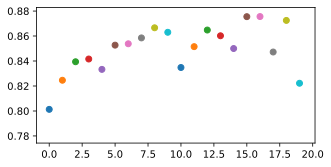

In [52]:
num_epochs , lr = 20,100.0

def train(train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
        # 训练集      测试集     损失             批量规模      参数       学习率    优化器
    for epoch in range(num_epochs):
        train_l_sum , train_acc_sum , n = 0.0 , 0.0 , 0
        for X , y in train_iter:
            y_hat = net(X)
            l = loss(y_hat,y).sum()
            
            #梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            #梯度回溯
            l.backward()
            if optimizer is None:
                d2l.sgd(params,lr,batch_size) #小批量梯度下降
            else:
                optimizer.step()
                
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1)==y).sum().item()
            n+=y.shape[0]
        
        test_acc = d2l.evaluate_accuracy(test_iter,net)
        
        plt.scatter(epoch,test_acc,linestyle = '-')
        
        print('epoch %d , loss %f , train acc %f , test acc %f' % (epoch + 1,train_l_sum / n, train_acc_sum / n , test_acc))
        
train(train_iter,test_iter,loss,num_epochs,batch_size,params,lr)